In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Όλα τα Range Queries (0.01, 0.05, 0.1, 0.5, 1) για το T2 Dataset

In [2]:
quad = pd.read_csv("results\\range_time\\T2\\quad_range_timing.csv")
r_str = pd.read_csv("results\\range_time\\T2\\range_query_timing_rtree_str.csv")
r_z = pd.read_csv("results\\range_time\\T2\\range_query_timing_rtree_z.csv")

naive0 = pd.read_csv("results\\range_time\\T2\\naive_range_timing_0.csv")
naive1 = pd.read_csv("results\\range_time\\T2\\naive_range_timing_1.csv")

naive = pd.concat((naive0, naive1))

In [ ]:
[0.051, 0.25, 0.51, 2.53, 5.07]

In [56]:
# Μέσο εμβαδόν των range rectangles κάθε αρχείου
# [0.01, 0.05, 0.1, 0.5, 0.1] 
files = [0.05069954809, 0.25349947218400004, 0.507003424246,  2.534995030632, 5.070011641561]

# Μέσοι χρόνοι για κάθε μεθοδολογία και range file
# e.g. quad_times = [mean_t_0.01, mean_t_0.05, mean_t_0.1, mean_t_0.5, mean_t_1] 
quad_times = quad['mean_us'].values
r_str_times = r_str['mean_us'].values
r_z_times = r_z['mean_us'].values
naive_times = naive['mean_us'].values

In [52]:
# Κλήση (μsec/area of query) και intercept (~χρονος αρχικού traversal μsec) για κάθε μεθοδολογία
times = [quad_times, r_z_times, r_str_times, naive_times]

for time in times:  
    lr = LinearRegression()
    lr.fit(np.array(files).reshape(-1,1), time)
    print(lr.coef_.item())
    print(lr.intercept_.item())
    print()

1184.6735780811434
-29.62011363510578

785.8908617925715
57.01963284798467

787.7347274327761
32.72596108576772

-845.2098430930987
29561.07655739514



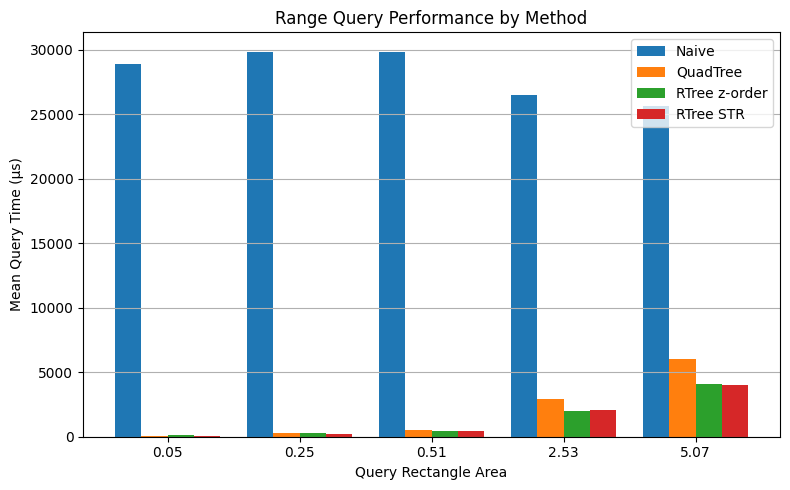

In [67]:
# Bar plots για κάθε το μέσο χρόνο του range query, ανάλογα με το μέσο εύρος του ορθογωνίου
x = np.arange(len(files)) 
width = 0.2 

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(x - 1.5 * width, naive_times, width, label='Naive')
ax.bar(x - 0.5 * width, quad_times, width, label='QuadTree')
ax.bar(x + 0.5 * width, r_z_times, width, label='RTree z-order')
ax.bar(x + 1.5 * width, r_str_times, width, label='RTree STR')

ax.set_xlabel('Query Rectangle Area')
ax.set_ylabel('Mean Query Time (µs)')
ax.set_title('Range Query Performance by Method')
ax.set_xticks(x)
ax.set_xticklabels([round(file,2) for file in files])
ax.legend()

plt.tight_layout()
plt.grid(axis='y')
plt.savefig('plots/range_query_bar_plot.png')
plt.show()

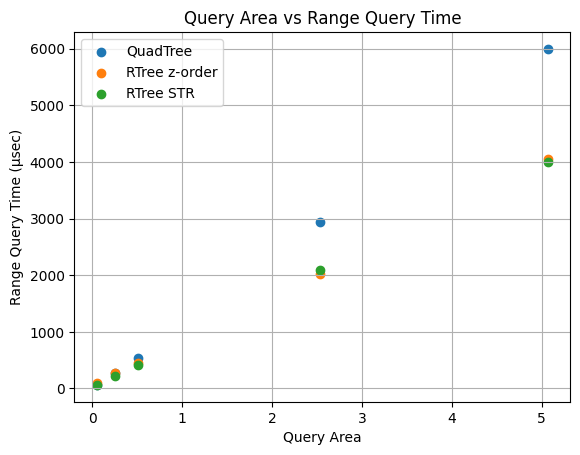

In [41]:
# scatter plots query area vs range query time εξαιρώντας την naive μεθοδολογία
plt.scatter(files, quad_times, label = "QuadTree")
plt.scatter(files, r_z_times, label = "RTree z-order")
plt.scatter(files, r_str_times, label = "RTree STR")

plt.title("Query Area vs Range Query Time")
plt.xlabel("Query Area")
plt.ylabel("Range Query Time (μsec)")
plt.grid()
plt.legend()
plt.savefig("plots/trees_vs_range_T2.png", bbox_inches="tight")

# Όλα τα Range Queries (0.01, 0.05, 0.1, 0.5, 1) για το T5 Dataset
- όμοια με το T2, χωρίς naive

In [42]:
quad = pd.read_csv("results\\range_time\\T5\\quad_range_timing.csv")
r_str = pd.read_csv("results\\range_time\\T5\\range_query_timing_rtree_str.csv")
r_z = pd.read_csv("results\\range_time\\T5\\range_query_timing_rtree_z.csv")

In [43]:
files = [0.05069954809, 0.25349947218400004, 0.507003424246,  2.534995030632, 5.070011641561]
quad_times = quad['mean_us'].values
r_str_times = r_str['mean_us'].values
r_z_times = r_z['mean_us'].values

In [44]:
from sklearn.linear_model import LinearRegression
times = [quad_times, r_z_times, r_str_times]

for time in times:  
    lr = LinearRegression()
    lr.fit(np.array(files).reshape(-1,1), time)
    print(lr.coef_.item())
    print(lr.intercept_.item())
    print()

2483.085313551675
-12.567050697952254

1787.7891712507362
-16.03150436824535

1717.625311282878
108.015239216807



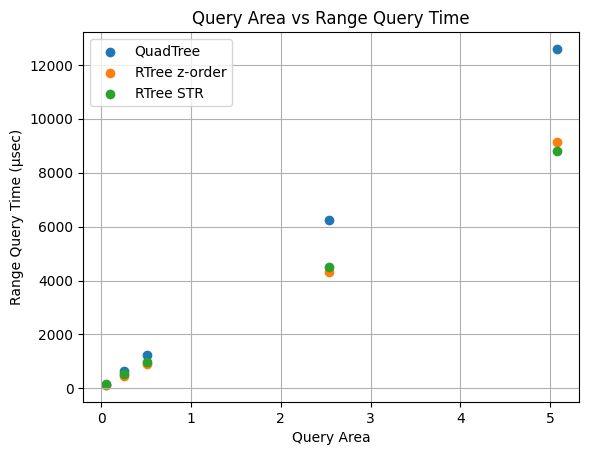

In [45]:
plt.scatter(files, quad_times, label = "QuadTree")
plt.scatter(files, r_z_times, label = "RTree z-order")
plt.scatter(files, r_str_times, label = "RTree STR")

plt.title("Query Area vs Range Query Time")
plt.xlabel("Query Area")
plt.ylabel("Range Query Time (μsec)")
plt.grid()
plt.legend()
plt.savefig("plots/trees_vs_range_T5.png", bbox_inches="tight")